<h1><center> Using Regression </center></h1>

The dataset was obtained from multiple sources, including surveys, job posting sites, and other publicly available sources.A total of 6704 data points
 were collected.The dataset included fivevariables: age, experience, job role, and education level and salary.

Q1. Analysis on the dataset(EDA) and build a machine learning model which predicts salary, try to create 
    model with better accuracy and prediction

Q2. Apply different loss and cost function for the ml model and explain the reason why this loss function used
    (if you have used multiple loss function).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import HuberRegressor

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


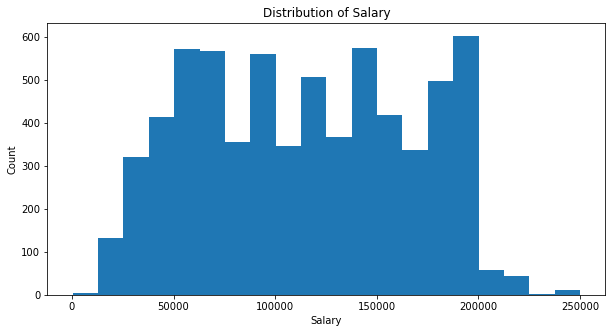

In [9]:
# Analyze the distribution of the target variable (Salary)
plt.figure(figsize=(10,5))
plt.hist(df['Salary'], bins=20)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.show()

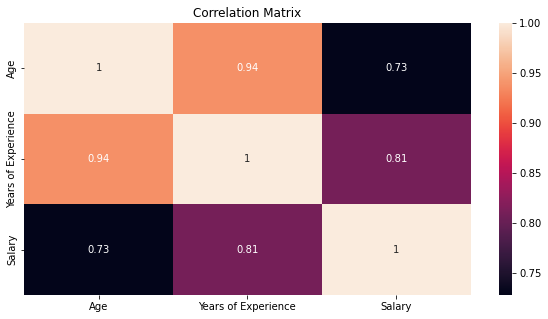

In [11]:
# Visualize the correlation between variables
plt.figure(figsize=(10,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Drop any irrelevant columns if necessary
df = df.drop(['Gender'], axis=1)  

In [13]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Job Title'] = label_encoder.fit_transform(df['Job Title'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])

In [14]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['Salary'], axis=1)
y = df['Salary']

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the linear regression model
model = LinearRegression()

In [17]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the salaries for the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 942485779.912547
Mean Absolute Error: 24272.59461887352


The MSE value of 942485779.912547 suggests that, on average, the squared difference between the predicted and actual salaries is quite high. Similarly, the MAE value of 24272.59461887352 indicates that, on average, the absolute difference between the predicted and actual salaries is around 24272.59 units.

In [21]:
# Initialize the Huber regression model
model = HuberRegressor(epsilon=1.35)

In [22]:
# Fit the model to the training data
model.fit(X_train, y_train)

HuberRegressor()

In [23]:
# Predict the salaries for the test set
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error (Huber):', mse)
print('Mean Absolute Error (Huber):', mae)

Mean Squared Error (Huber): 998750242.8729413
Mean Absolute Error (Huber): 23271.241527191945


The MSE value of 998750242.8729413 indicates that, on average, the squared difference between the predicted and actual salaries (using Huber loss) is quite high. Similarly, the MAE value of 23271.241527191945 suggests that, on average, the absolute difference between the predicted and actual salaries (using Huber loss) is around 23271.24 units.

The Huber loss function is a robust loss function that combines the characteristics of both the squared loss (MSE) and the absolute loss (MAE). It is less sensitive to outliers compared to MSE and provides a balance between robustness and smoothness.

When the Huber loss is used, it penalizes the model more for large errors (outliers) and less for small errors (inliers). This can be particularly useful when dealing with datasets that contain outliers or noisy data. By using the Huber loss, the model with a loss function that is more robust to outliers can help improve the model's performance in such scenarios.